# Medical Cost Personal Datasets

In [260]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Login to drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [213]:
# Change the directory for read csv file.
import os
os.chdir('MyDrive/data_science_project')

## Loading the Medical Cost Personal Dataset

In [214]:
df = pd.read_csv('insurance.csv')
# First 5 row
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [215]:
# Describing the data variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Analysis

In [216]:
#Correlation between columns
df.corr()

<ipython-input-216-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Correlations between columns totally are positive but not strong.**

### Examine the distribution of Bmi (Body Mass Index)

<ipython-input-217-dbd7709c66b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

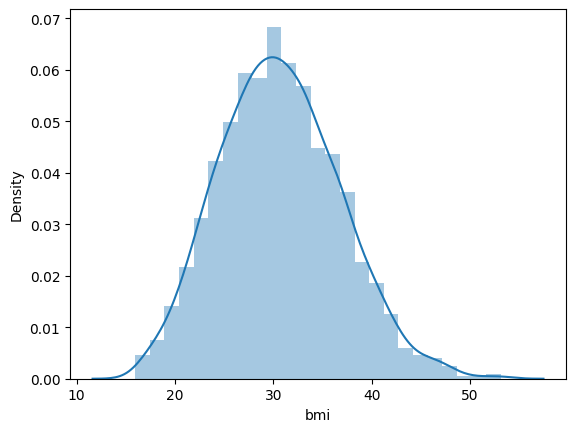

In [217]:
# Distrubition of bmi
sns.distplot(df['bmi'])

**Distrubition of Bmi is at most close to 30.**

### Examine the Smokers Column

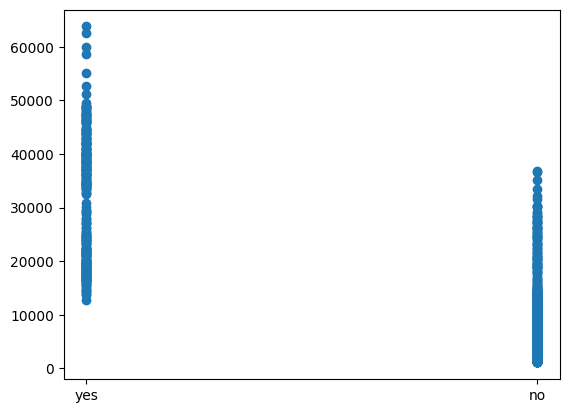

In [218]:
# Relationship between Smoker and Charges
plt.scatter(x='smoker', y='charges', data=df)
plt.title = 'Relationship between Smoker and Charges'
plt.show()

**If a user is smoker cost might be higher than user who is not smoker.**

<Axes: xlabel='region'>

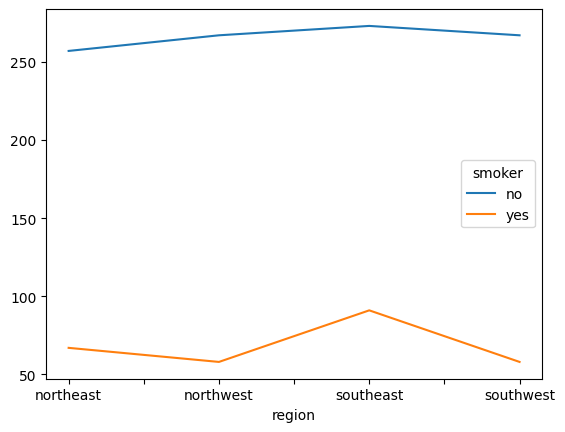

In [219]:
df.groupby(['region', 'smoker']).size().unstack().plot()

**There is not relationship between smoker and region.**




### Examine the Bmi Column

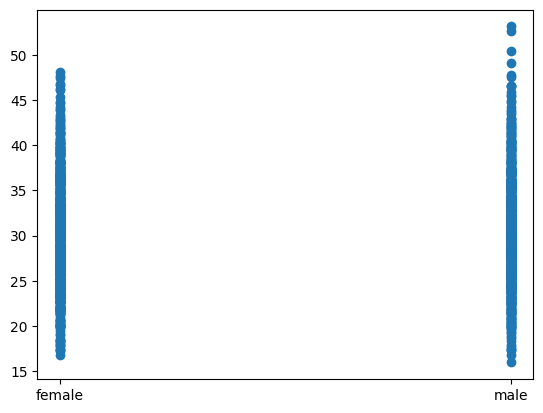

In [220]:
# Relationship between Bmi and Sex
plt.scatter(x = 'sex', y='bmi', data=df)

**Male might be higher bmi value.**



age         0.109272
bmi         1.000000
children    0.012759
charges     0.198341
Name: bmi, dtype: float64


<ipython-input-221-c8ce1ca7a041>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['bmi'])


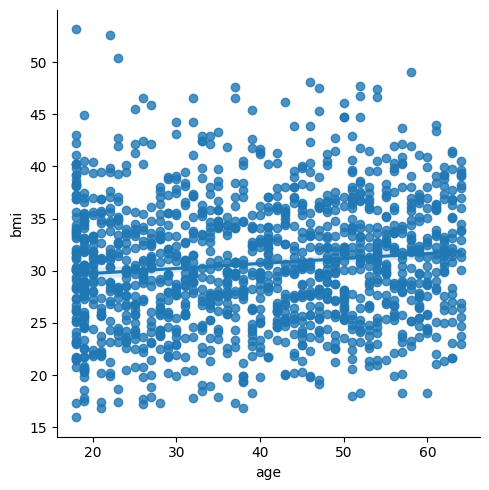

In [221]:
# Examine the relationship between “age” and “bmi”.
sns.lmplot(x='age', y='bmi', data=df)
print(df.corr()['bmi'])

**Can be seen with correlation and graph. There is not much relationship between age and bmi.**



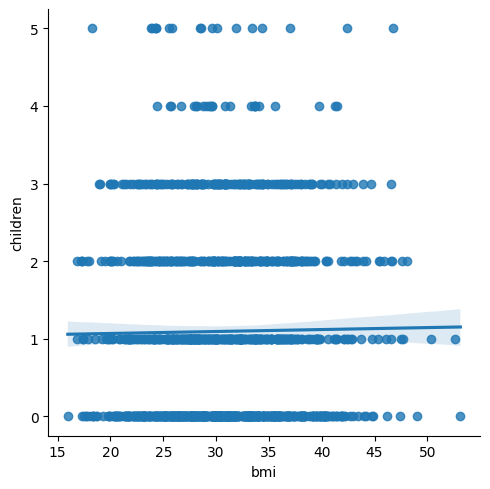

In [222]:
#Examine the relationship between “bmi” and “children”.
sns.lmplot(x='bmi', y='children', data=df)

**There is not relationship between bmi and children**

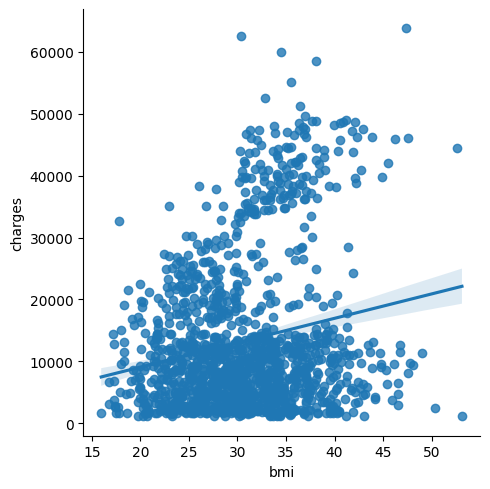

In [223]:
#Examine the relationship between “bmi” and “charges”.
sns.lmplot(x='bmi', y='charges', data=df)

### Find the &quot;region&quot; with the most &quot;children&quot;

<ipython-input-224-bd3db2496071>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').aggregate('sum')['children'].plot()


<Axes: xlabel='region'>

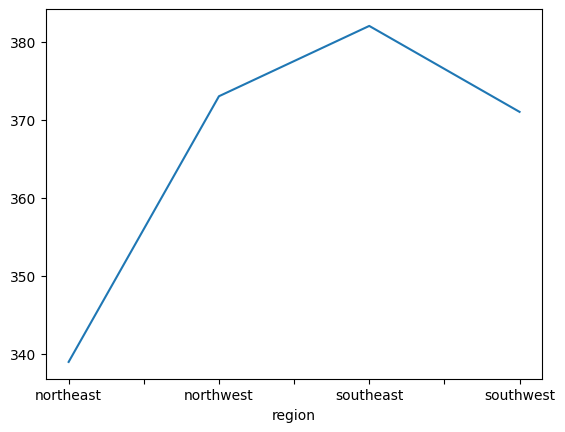

In [224]:
df.groupby('region').aggregate('sum')['children'].plot()

**Most children are in southeast.**

### Is there an outlier in the &quot;bmi&quot; variable?

<Axes: xlabel='bmi'>

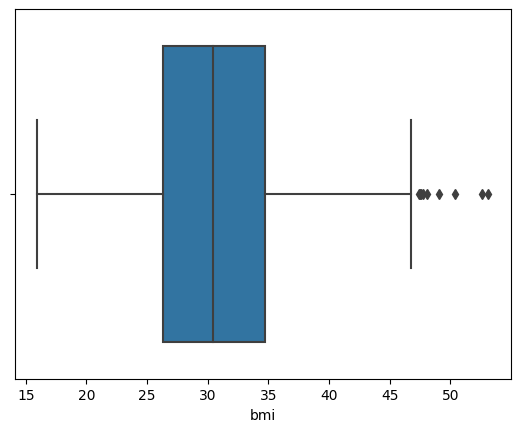

In [225]:
sns.boxplot(x = df['bmi'])

**Can be seen there are outlier values. Also distplot shows the outlier values because of left polarity and right polarity height is not same.**

### Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

<Axes: xlabel='region', ylabel='charges'>

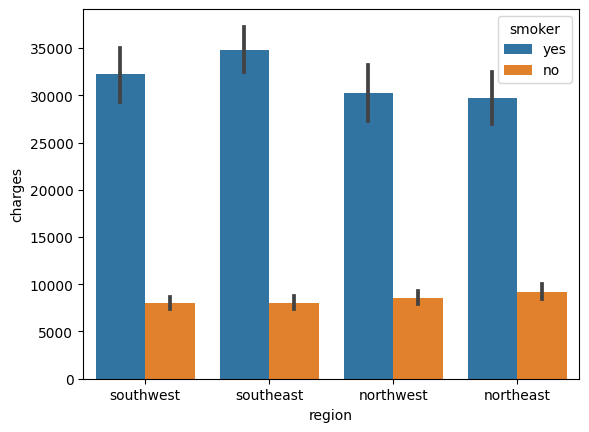

In [226]:
sns.barplot(x='region', y='charges', hue='smoker',data=df)

**People who are in southeast region and smoker are potentially cost much for medical.
Oppose of people who are in southeast region and not smoker are potentially least cost for medical.**

## Data Preprocessing

In [261]:
# Control for nan values
df.isna().sum()

age          0
bmi          0
children     0
northeast    0
northwest    0
southeast    0
southwest    0
sex          0
smoker       0
charges      0
dtype: int64

**There aren't null values.**

### Outlier Values

In [228]:
# Handling outlier values with z scores

z_scores = np.abs((df["bmi"] - df["bmi"].mean()) / df["bmi"].std())

z_threshold = 2

# Outlier values assign to mean values
df.loc[z_scores > z_threshold, 'bmi'] = df['bmi'].mean()

**We are transforming into average value bmi values which values higher than 47.29. Average value can be seen in df.describe method. There is table above about mean, count etc.**

<Axes: xlabel='bmi'>

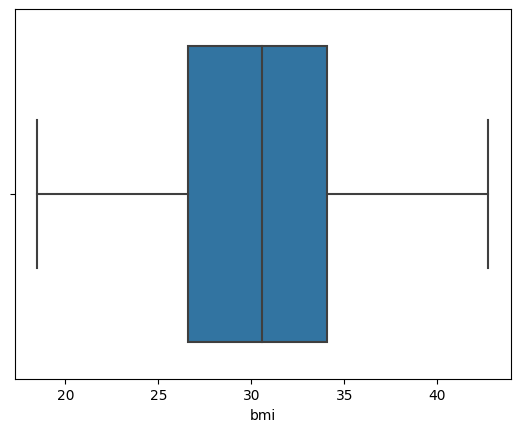

In [229]:
# Control again for outlier values.
sns.boxplot(x=df['bmi'])

### Encoding

In [230]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoding for Sex
sex = df.iloc[:, 1].values
le = LabelEncoder()
sex = le.fit_transform(sex)

# LabelEncoding for Smoker
smoker = df.iloc[:, 4].values
le2 = LabelEncoder()
smoker = le2.fit_transform(smoker)

In [231]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**There are 4 values. We have to use the onehotencoder if we aren't using for sorting purposes.**


In [232]:
# OneHotEncoding for Region
region = df.iloc[:, 4:5].values
le3 = LabelEncoder()
ohe = OneHotEncoder()
region[:, 0] = le3.fit_transform(df.iloc[:, 5])
region = ohe.fit_transform(region).toarray()

In [233]:
# Creating dataframe for encoding objects
region = pd.DataFrame(region, columns=['northeast', 'northwest', 'southeast', 'southwest'], index=range(1338))
sex = pd.DataFrame(sex, columns=['sex'], index=range(1338))
smoker = pd.DataFrame(smoker, columns=['smoker'], index=range(1338))

In [234]:
# Concat independent and dependent variables
x = pd.concat([df.iloc[:, [0, 2, 3]], region], axis=1)
x = pd.concat([x, sex], axis=1)
x = pd.concat([x, smoker], axis=1)
y = df['charges']

In [235]:
# all columns
df = pd.concat([x, y], axis=1)

### Train Test Split

In [236]:
df

,age,bmi,children,northeast,northwest,southeast,southwest,sex,smoker,charges
0,19,27.900,0,0.0,0.0,0.0,1.0,0,1,16884.92400
1,18,33.770,1,0.0,0.0,1.0,0.0,1,0,1725.55230
2,28,33.000,3,0.0,0.0,1.0,0.0,1,0,4449.46200
3,33,22.705,0,0.0,1.0,0.0,0.0,1,0,21984.47061
4,32,28.880,0,0.0,1.0,0.0,0.0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,0.0,0.0,1,0,10600.54830
1334,18,31.920,0,1.0,0.0,0.0,0.0,0,0,2205.98080
1335,18,36.850,0,0.0,0.0,1.0,0.0,0,0,1629.83350
1336,21,25.800,0,0.0,0.0,0.0,1.0,0,0,2007.94500


In [237]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
# split %67 and %33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

### Scaling

In [238]:
# import the scaler class
from sklearn.preprocessing import StandardScaler

# Scale X values with StandardScaler(-1, 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection

In [239]:
# import r2_score for compare models.
from sklearn.metrics import r2_score

### Linear Regression

In [240]:
# Multivariable LinearRegression
from sklearn.linear_model import LinearRegression

# Fitting and printing r2
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(r2_score(y_test, lr_pred))

0.7835572099039816


R2 score isn't that high.

### Support Vector

In [241]:
# SVR
from sklearn.svm import SVR

# Fitting and printing r2
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print(r2_score(y_test, svr_pred))

-0.09537742869467447


SVR ML can't be used.

### Ridge Regression

In [242]:
# Ridge
from sklearn.linear_model import Ridge

# Fitting and printing r2
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(r2_score(y_test, ridge_pred))

0.7835833034754301


### LASSO

In [243]:
# LASSO
from sklearn.linear_model import Lasso

# Fitting and printing r2
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(r2_score(y_test, lasso_pred))

0.7836635587691938


### Polynomial Regression

In [244]:
# Polynomial Regresssion
from sklearn.preprocessing import PolynomialFeatures

# Transform the X values to polynomial X value with degree
poly_feature = PolynomialFeatures(degree=2)
X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

# Fitting and printing r2
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

poly_pred = lr_poly.predict(X_test_poly)
print(r2_score(y_test, poly_pred))

0.8608593901133955


### Decision Tree Regression

In [245]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Fitting and printing r2
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

dtr_pred = dtr.predict(X_test)
print(r2_score(y_test, dtr_pred))

0.6649199860188728


### Random Forest Regression

In [246]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Fitting and printing r2
rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(X_train, y_train)

rfr_pred = rfr.predict(X_test)
print(r2_score(y_test, rfr_pred))

0.8490688313016741


### Stochastic Gradient Descent

In [247]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# Fitting and printing r2
sgdr = SGDRegressor(loss='squared_error')
sgdr.fit(X_train, y_train)

sgdr_pred = sgdr.predict(X_test)
print(r2_score(y_test, sgdr_pred))

0.7838658018742374


## K-fold Cross Validation

Using 10-fold cross validation.

### Linear Regression

In [248]:
# Importing cross_val_score for k-fold cross validation
from sklearn.model_selection import cross_val_score

In [262]:
# k-fold
lr_cross = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print('Linear Regression Max Score:', lr_cross.max(), 'Average Score:', lr_cross.mean())

Linear Regression Max Score: 0.7958866017970488 Average Score: 0.7151952518561999


### Support Vector

In [250]:
# k-fold
svr_cross = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=10)
print('SVR Max Score:', svr_cross.max(), 'Average Score:', svr_cross.mean())

SVR Max Score: -0.011023244096272533 Average Score: -0.09945925680552906


Negative values means can't be used for prediction.

### Ridge Regression

In [251]:
# k-fold
ridge_cross = cross_val_score(estimator=ridge, X=X_train, y=y_train, cv=10)
print('Ridge Regression Max Score:', ridge_cross.max(), 'Average Score:', ridge_cross.mean())

Ridge Regression Max Score: 0.7955267302771576 Average Score: 0.7149012949549404


### LASSO

In [252]:
# k-fold
lasso_cross = cross_val_score(estimator=lasso, X=X_train, y=y_train, cv=10)
print('LASSO Max Score:', lasso_cross.max(), 'Average Score:', lasso_cross.mean())

LASSO Max Score: 0.7956548253060756 Average Score: 0.7148780828526943


### Polynomial Regression

In [253]:
# k-fold
poly_cross = cross_val_score(estimator=lr_poly, X=X_train_poly, y=y_train, cv=10)
print('Polynomial Regression Max Score:', poly_cross.max(), 'Average Score:', poly_cross.mean())

Polynomial Regression Max Score: 0.8546626397364729 Average Score: 0.7980686001435959


### Decision Tree Regression

In [254]:
# k-fold
dtr_cross = cross_val_score(estimator=dtr, X=X_train, y=y_train, cv=10)
print('Decision Tree Regressor Max Score:', dtr_cross.max(), 'Average Score:', dtr_cross.mean())

Decision Tree Regressor Max Score: 0.8556026828223272 Average Score: 0.6339491224741043


**Why best score and average score have much that difference? Because of decision tree is overfitting the y_train values. Model cant exceed the beyond y_train values.**

### Random Forest Regression

In [255]:
# k-fold
rfr_cross = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=10)
print('Random Forest Regressor Max Score:', rfr_cross.max(), 'Average Score:', rfr_cross.mean())

Random Forest Regressor Max Score: 0.880302760808615 Average Score: 0.7843845225943327


### Stochastic Gradient Descent

In [256]:
# k-fold
sgdr_cross = cross_val_score(estimator=sgdr, X=X_train, y=y_train, cv=10)
print('Stochastic Gradient Descent Max Score:', sgdr_cross.max(), 'Average Score:', sgdr_cross.mean())

Stochastic Gradient Descent Max Score: 0.7958841021768808 Average Score: 0.7150399976962745


We can interpret Polynomial Regression and Random Forest is best at prediction. For average score Polynomial is best, for max score Random forest is best.

## GridSearchCV

Using GridSearchCV optimization for two models.

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
rf_p = [
    {'fit_intercept': [True, False]}
]

gs = GridSearchCV(
      estimator = lr_poly,
      param_grid = rf_p,
      scoring = 'r2',
      cv = 10,
      n_jobs = -1
    )
grid_search_poly = gs.fit(X_train_poly, y_train)
print(grid_search_poly.best_score_)
print(grid_search_poly.best_params_)

0.7987893764748406
{'fit_intercept': False}


In [259]:
rfr_p = [
    {'n_estimators':[10, 100, 1000, 10000]}
]

gs = GridSearchCV(
    estimator = rfr,
    param_grid = rfr_p,
    scoring = 'r2',
    cv = 10,
    n_jobs = -1
)

grid_search_rfr = gs.fit(X_train, y_train)
print(grid_search_rfr.best_score_)
print(grid_search_rfr.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.7999390429549765
{'n_estimators': 1000}


## Model Evaluation

In [263]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [264]:
# Error evaluation for Polynomial Regression and Random Forest

# GridSearchCV prediction for X_tests
grid_search_poly_pred = grid_search_poly.predict(X_test_poly)
grid_search_rfr_pred = grid_search_rfr.predict(X_test)

In [265]:
# Polynomial Regression mean_squared_error and mean_absolute_error
print(mean_squared_error(y_test, grid_search_poly_pred))
print(mean_absolute_error(y_test, grid_search_poly_pred))

22256777.907328088
3010.6822957217196


In [266]:
print(mean_squared_error(y_test, grid_search_rfr_pred))
print(mean_absolute_error(y_test, grid_search_rfr_pred))

22434215.473457966
2833.9062392420874


***This is final evaluation of two models. Random Forest model's result is better than Polynomial Regression's. But is error values are bad or good thing? Charges values are between 1000 and 60000 and standard deviation is 12000. There is a generally 2880 and 3000 value difference prediction and test value. These values dependent on you for interpretion.***